#### **Import Preprocessed Dataset**

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display

df = pd.read_csv('pca_transformed_output.csv')
display(df.head())

print(df['label'].value_counts())

,PC1,PC2,PC3,PC4,PC5,label
0,-2.260593,-0.344510,-1.609809,-1.053710,0.947905,0
1,-0.133474,3.105938,1.462322,0.828849,-1.380897,0
2,-1.977600,-0.341556,-1.687737,-1.246947,1.309119,0
3,-1.479357,0.897614,-0.858482,1.035689,-0.989909,0
4,-1.680400,2.221787,-1.015449,2.698644,1.534467,1


label
0    4132
1    4128
Name: count, dtype: int64


Relatively even split of each class from our previous usage of SMOTE, ideal for training our decision tree classifier and other models

#### **Decision Tree Classifier**

Average Precision: 0.7663
Average Recall: 0.7659
Average F1 Score: 0.7658
Average Accuracy: 0.7659


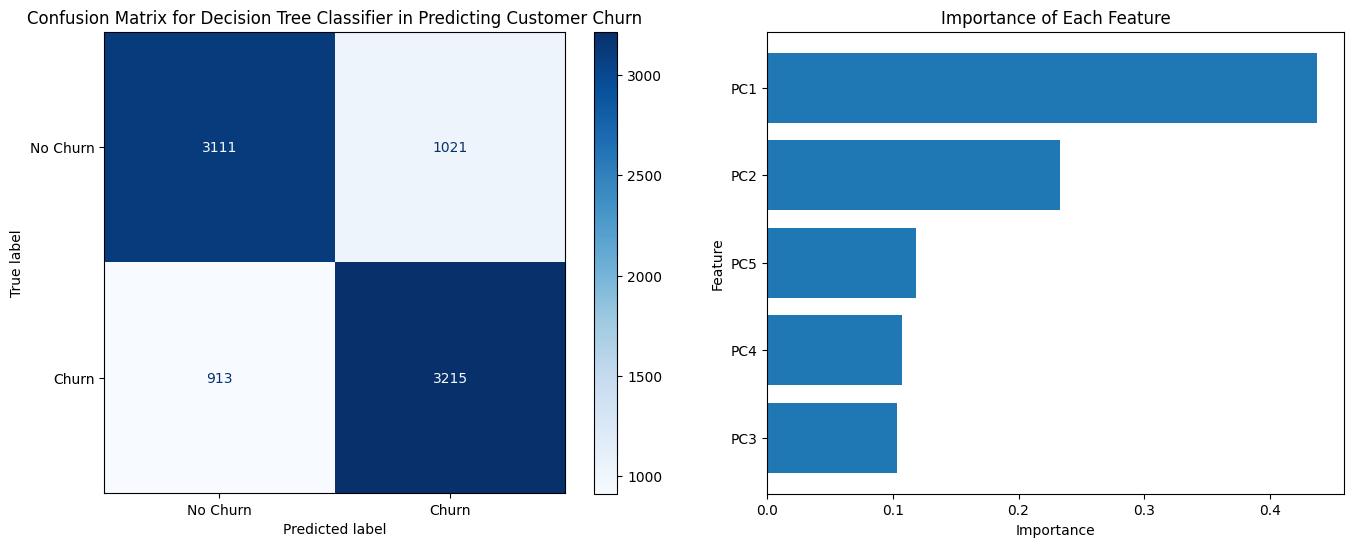

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

k = 5
kf = KFold(n_splits =  k, shuffle=True, random_state=42)

X = df.drop(columns = ['label'])
y = df[['label']]
feature_names = X.columns

decision_tree_classifier_model = DecisionTreeClassifier(random_state=42)

precision_list, recall_list, f1_list, accuracy_list, confusion_matrices_list, feature_importances_list = [], [], [], [], [], []

y = np.ravel(y)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    decision_tree_classifier_model.fit(X_train, y_train)
    predicted_values = decision_tree_classifier_model.predict(X_test)

    precision_list.append(precision_score(y_test, predicted_values, average='weighted'))
    recall_list.append(recall_score(y_test, predicted_values, average='weighted'))
    f1_list.append(f1_score(y_test, predicted_values, average='weighted'))
    accuracy_list.append(accuracy_score(y_test, predicted_values))
    confusion_matrices_list.append(confusion_matrix(y_test, predicted_values))
    feature_importances_list.append(decision_tree_classifier_model.feature_importances_)

print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")

aggregate_conf_matrix = sum(confusion_matrices_list)

average_feature_importances = np.mean(feature_importances_list, axis = 0)

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': average_feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

fig, axs = plt.subplots(1, 2, figsize = (16, 6))
ConfusionMatrixDisplay(confusion_matrix=aggregate_conf_matrix, display_labels=['No Churn', 'Churn']).plot(cmap = 'Blues', ax = axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree Classifier in Predicting Customer Churn')

axs[1].barh(
    feature_importances_df['Feature'],
    feature_importances_df['Importance'],
    align='center'
)
axs[1].invert_yaxis()  # To display the most important feature at the top
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Feature')
axs[1].set_title('Importance of Each Feature')

# Adjust layout
plt.subplots_adjust(wspace=0.15)
plt.show()